<a href="https://colab.research.google.com/github/Romo4kaaa/IAD_R_K/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from IPython.display import display
import random
import numpy as np
import matplotlib.pyplot as plt

N = 30

# Генеруємо першу випадкову послідовність з чисел в діапазоні від 0 до 99
x_prob = [random.randint(0, 99) for _ in range(N)]

y_prob = [random.choice([0, 99]) for _ in range(N)]

print("Перша випадкова послідовність:", x_prob)
print("Друга випадкова послідовність:", y_prob)


Перша випадкова послідовність: [66, 79, 16, 14, 92, 58, 67, 59, 89, 86, 92, 86, 25, 92, 76, 17, 66, 31, 67, 0, 7, 10, 79, 68, 15, 9, 27, 49, 51, 39]
Друга випадкова послідовність: [99, 99, 0, 99, 0, 0, 99, 0, 0, 0, 99, 99, 99, 0, 99, 99, 99, 0, 0, 0, 99, 0, 99, 0, 99, 99, 0, 0, 0, 99]


In [2]:
def generateSequence(N:int, a0:float, d:float) -> list[float]:
    return [a0 + d * i for i in range(N)]

Xdetup = generateSequence(N, np.random.randint(-N, N), np.random.randint(1, N))
Ydetup = generateSequence(N, np.random.randint(-N, N), np.random.randint(1, N))

Xdetdown = generateSequence(N, np.random.randint(-N, N), np.random.randint(-N, 0))
Ydetdown = generateSequence(N, np.random.randint(-N, N), np.random.randint(-N, 0))

print("Xdetup = ", Xdetup)
print("Ydetup = ", Ydetup)
print("Xdetdown = ", Xdetdown)
print("Ydetdown = ", Ydetdown)

Xdetup =  [-2, 22, 46, 70, 94, 118, 142, 166, 190, 214, 238, 262, 286, 310, 334, 358, 382, 406, 430, 454, 478, 502, 526, 550, 574, 598, 622, 646, 670, 694]
Ydetup =  [-15, -7, 1, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97, 105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201, 209, 217]
Xdetdown =  [-21, -38, -55, -72, -89, -106, -123, -140, -157, -174, -191, -208, -225, -242, -259, -276, -293, -310, -327, -344, -361, -378, -395, -412, -429, -446, -463, -480, -497, -514]
Ydetdown =  [-20, -38, -56, -74, -92, -110, -128, -146, -164, -182, -200, -218, -236, -254, -272, -290, -308, -326, -344, -362, -380, -398, -416, -434, -452, -470, -488, -506, -524, -542]


x_stoch1 =  [64, 101, 62, 84, 186, 176, 209, 225, 279, 300, 330, 348, 311, 402, 410, 375, 448, 437, 497, 454, 485, 512, 605, 618, 589, 607, 649, 695, 721, 733]
x_stoch2 =  [45, 41, -39, -58, 3, -48, -56, -81, -68, -88, -99, -122, -200, -150, -183, -259, -227, -279, -260, -344, -354, -368, -316, -344, -414, -437, -436, -431, -446, -475]
y_stoch1 =  [84, 92, 1, 108, 17, 25, 132, 41, 49, 57, 164, 172, 180, 89, 196, 204, 212, 121, 129, 137, 244, 153, 260, 169, 276, 284, 193, 201, 209, 316]
y_stoch2 =  [79, 61, -56, 25, -92, -110, -29, -146, -164, -182, -101, -119, -137, -254, -173, -191, -209, -326, -344, -362, -281, -398, -317, -434, -353, -371, -488, -506, -524, -443]


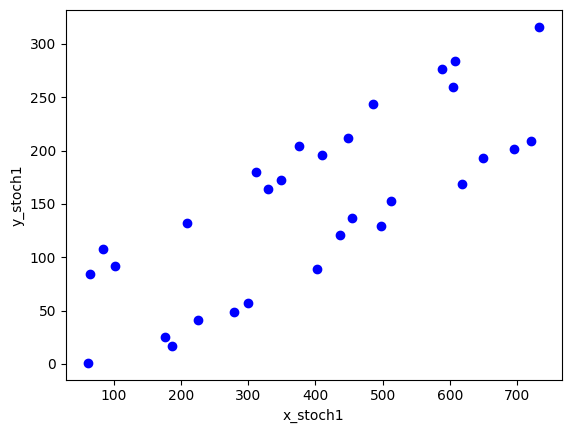

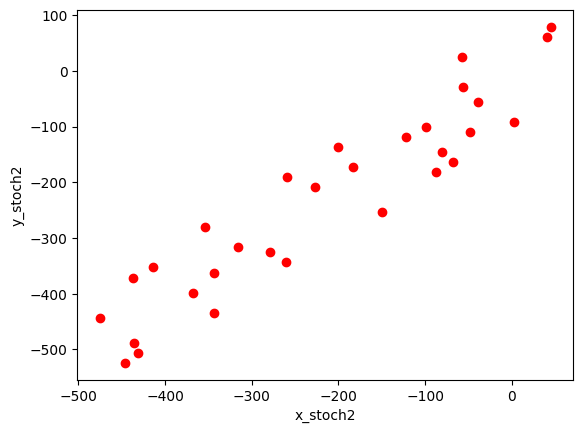

In [3]:
x_stoch1 = np.add(x_prob, Xdetup)
x_stoch2 = np.add(x_prob, Xdetdown)

y_stoch1 = np.add(y_prob, Ydetup)
y_stoch2 = np.add(y_prob, Ydetdown)

print("x_stoch1 = ", x_stoch1.tolist())
print("x_stoch2 = ", x_stoch2.tolist())
print("y_stoch1 = ", y_stoch1.tolist())
print("y_stoch2 = ", y_stoch2.tolist())

plt.plot(x_stoch1, y_stoch1, 'bo')
plt.xlabel('x_stoch1')
plt.ylabel('y_stoch1')
plt.show()

plt.plot(x_stoch2, y_stoch2, 'ro')
plt.xlabel('x_stoch2')
plt.ylabel('y_stoch2')
plt.show()


In [4]:
def calc(X: list[float], Y: list[float]):
    X_v = np.sum(X) / N
    Y_v = np.sum(Y) / N

    M_XY = np.sum([(X[i] - X_v) * (Y[i] - Y_v) for i in range(N)]) / N

    D_X = np.sum([(X[i] - X_v) ** 2 for i in range(N)]) / N
    D_Y = np.sum([(Y[i] - Y_v) ** 2 for i in range(N)]) / N

    R_XY = M_XY / np.sqrt(D_X * D_Y)

    return{
        "X_v": X_v,
        "Y_v": Y_v,
        "M_XY": M_XY,
        "D_X": D_X,
        "D_Y": D_Y,
        "R_XY": R_XY
    }

result = [
    calc(x_prob, y_prob),
    calc(x_prob, x_stoch1),
    calc(x_prob, x_stoch2),
    calc(y_prob, y_stoch1),
    calc(y_prob, y_stoch2),
    calc(x_stoch1, y_stoch1),
    calc(x_stoch2, y_stoch2)
]

display(
    pd.DataFrame(
        result,
        index = range(1, len(result)+1)
    )
)

,X_v,Y_v,M_XY,D_X,D_Y,R_XY
1,51.066667,49.500000,-95.700000,910.728889,2450.250000,-0.064064
2,51.066667,397.066667,-1338.071111,910.728889,39565.128889,-0.222909
3,51.066667,-216.433333,2503.628889,910.728889,25747.445556,0.517021
4,49.500000,150.500000,2199.450000,2450.250000,6743.316667,0.541093
5,49.500000,-231.500000,3014.550000,2450.250000,27851.850000,0.364914
6,397.066667,150.500000,12786.300000,39565.128889,6743.316667,0.782802
7,-216.433333,-231.500000,25048.350000,25747.445556,27851.850000,0.935373


In [5]:
for i in range(len(result)):
    print(i+1, '. ', result[i]['R_XY'])


1 .  -0.06406372428983467
2 .  -0.2229093808301678
3 .  0.5170211668393289
4 .  0.5410932513850522
5 .  0.3649137843711496
6 .  0.7828018081714664
7 .  0.9353734208264908
